# Modern Data Analytics [G0Z39a]

## Project: Covid 19 in the USA

### Load packages

In [1]:
import mda_module_003 as mda

import os
import pandas as pd
import numpy as np


import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

import plotly.offline as py
py.init_notebook_mode(connected=True)
pio.renderers.default = 'plotly_mimetype'
  
import matplotlib.pyplot as plt

import datetime as dt

import ipywidgets as widgets
from IPython.display import display

from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
cwd = os.getcwd()

In [3]:
cwd

'C:\\Users\\35799\\Desktop\\KU Leuven\\Semester 2\\Modern Data Analytics\\project'

In [4]:
us = pd.read_csv(cwd+"/covid-19-data/us.csv")
counties_df = pd.read_csv(cwd+"/covid-19-data/us-counties.csv")
states_df = pd.read_csv(cwd+"/covid-19-data/us-states.csv")
counties20 = pd.read_csv(cwd+"/covid-19-data/us-counties-2020.csv")
counties21 = pd.read_csv(cwd+"/covid-19-data/us-counties-2021.csv")
counties22 = pd.read_csv(cwd+"/covid-19-data/us-counties-2022.csv")
facilities = pd.read_csv(cwd+"/covid-19-data/prisons/facilities.csv")
systems = pd.read_csv(cwd+"/covid-19-data/prisons/systems.csv")
colleges =  pd.read_csv(cwd+"/covid-19-data/colleges/colleges.csv")
c20_avg = pd.read_csv(cwd+"/covid-19-data/rolling-averages/us-counties-2020.csv")
c21_avg = pd.read_csv(cwd+"/covid-19-data/rolling-averages/us-counties-2021.csv")
c22_avg = pd.read_csv(cwd+"/covid-19-data/rolling-averages/us-counties-2022.csv")

### Data Info

#### US data

In [5]:
us.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [6]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    848 non-null    object
 1   cases   848 non-null    int64 
 2   deaths  848 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.0+ KB


In [7]:
us.describe()

,cases,deaths
count,8.480000e+02,848.000000
mean,3.000353e+07,470714.963443
std,2.585998e+07,317207.331664
min,1.000000e+00,0.000000
25%,5.575955e+06,173875.250000
50%,2.977638e+07,541126.000000
75%,4.494537e+07,725141.000000
max,8.270287e+07,999027.000000


In [8]:
us.isnull().sum()

date      0
cases     0
deaths    0
dtype: int64

#### State Data

In [9]:
states_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [10]:
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44582 entries, 0 to 44581
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    44582 non-null  object
 1   state   44582 non-null  object
 2   fips    44582 non-null  int64 
 3   cases   44582 non-null  int64 
 4   deaths  44582 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.7+ MB


In [11]:
states_df.describe()

,fips,cases,deaths
count,44582.000000,4.458200e+04,44582.000000
mean,32.135907,5.707010e+05,8953.530326
std,18.741658,9.870142e+05,14008.656249
min,1.000000,1.000000e+00,0.000000
25%,17.000000,3.745900e+04,665.000000
50%,31.000000,2.080800e+05,3276.000000
75%,46.000000,6.979412e+05,10913.000000
max,78.000000,9.398846e+06,91058.000000


In [12]:
states_df.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

#### County Data

In [13]:
counties20.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [14]:
counties20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884737 entries, 0 to 884736
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    884737 non-null  object 
 1   county  884737 non-null  object 
 2   state   884737 non-null  object 
 3   fips    876471 non-null  float64
 4   cases   884737 non-null  int64  
 5   deaths  865976 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 40.5+ MB


In [15]:
round(counties20.describe(), 3)

,fips,cases,deaths
count,876471.000,884737.000,865976.000
mean,31262.224,1952.319,53.597
std,16295.226,10106.483,451.857
min,1001.000,0.000,0.000
25%,18183.000,36.000,0.000
50%,29215.000,228.000,4.000
75%,46099.000,993.000,21.000
max,78030.000,770915.000,25144.000


In [16]:
counties20.isnull().sum()

date          0
county        0
state         0
fips       8266
cases         0
deaths    18761
dtype: int64

In [17]:
counties21.head()

,date,county,state,fips,cases,deaths
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0
2,2021-01-01,Barbour,Alabama,1005.0,1517,33.0
3,2021-01-01,Bibb,Alabama,1007.0,1854,46.0
4,2021-01-01,Blount,Alabama,1009.0,4693,63.0


In [18]:
counties21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185373 entries, 0 to 1185372
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   date    1185373 non-null  object 
 1   county  1185373 non-null  object 
 2   state   1185373 non-null  object 
 3   fips    1174570 non-null  float64
 4   cases   1185373 non-null  int64  
 5   deaths  1156903 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 54.3+ MB


In [19]:
round(counties21.describe(), 3)

,fips,cases,deaths
count,1174570.000,1185373.000,1156903.000
mean,31471.971,11160.310,193.609
std,16365.331,42189.206,881.253
min,1001.000,0.000,0.000
25%,19035.000,1136.000,20.000
50%,30026.000,2778.000,52.000
75%,46119.000,7340.000,125.000
max,78030.000,1697286.000,35382.000


In [20]:
counties21.isnull().sum()

date          0
county        0
state         0
fips      10803
cases         0
deaths    28470
dtype: int64

In [21]:
counties22.head()

,date,county,state,fips,cases,deaths
0,2022-01-01,Autauga,Alabama,1001.0,11018,160.0
1,2022-01-01,Baldwin,Alabama,1003.0,39911,593.0
2,2022-01-01,Barbour,Alabama,1005.0,3860,81.0
3,2022-01-01,Bibb,Alabama,1007.0,4533,95.0
4,2022-01-01,Blount,Alabama,1009.0,11256,198.0


In [22]:
counties22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445749 entries, 0 to 445748
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    445749 non-null  object 
 1   county  445749 non-null  object 
 2   state   445749 non-null  object 
 3   fips    440986 non-null  float64
 4   cases   445749 non-null  int64  
 5   deaths  435063 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.4+ MB


In [23]:
round(counties22.describe(), 3)

,fips,cases,deaths
count,440986.000,445749.000,435063.000
mean,31482.119,23525.757,295.973
std,16374.727,87734.218,1144.171
min,1001.000,0.000,0.000
25%,19035.000,2451.000,38.000
50%,30027.000,5973.000,91.000
75%,46121.000,15602.000,218.000
max,78030.000,2918596.000,40291.000


In [24]:
counties22.isnull().sum()

date          0
county        0
state         0
fips       4763
cases         0
deaths    10686
dtype: int64

In [25]:
c20_avg.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


In [26]:
c20_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889765 entries, 0 to 889764
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 889765 non-null  object 
 1   geoid                889765 non-null  object 
 2   county               889765 non-null  object 
 3   state                889765 non-null  object 
 4   cases                889765 non-null  int64  
 5   cases_avg            889765 non-null  float64
 6   cases_avg_per_100k   877322 non-null  float64
 7   deaths               889765 non-null  int64  
 8   deaths_avg           889765 non-null  float64
 9   deaths_avg_per_100k  877322 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 67.9+ MB


In [27]:
round(c20_avg.describe(), 3)

,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
count,889765.000,889765.000,877322.000,889765.000,889765.000,877322.000
mean,22.498,22.165,23.889,0.388,0.409,0.491
std,140.052,121.881,35.650,4.670,3.876,1.215
min,-6994.000,0.000,0.000,-678.000,0.000,0.000
25%,0.000,0.670,3.090,0.000,0.000,0.000
50%,2.000,3.140,10.890,0.000,0.000,0.000
75%,12.000,12.430,30.580,0.000,0.250,0.520
max,29174.000,14831.000,1648.350,1221.000,828.860,46.720


In [28]:
c20_avg.isnull().sum()

date                       0
geoid                      0
county                     0
state                      0
cases                      0
cases_avg                  0
cases_avg_per_100k     12443
deaths                     0
deaths_avg                 0
deaths_avg_per_100k    12443
dtype: int64

In [29]:
c21_avg.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2021-01-01,USA-72999,Unknown,Puerto Rico,-17,35.29,NaN,0,0.0,NaN
1,2021-01-01,USA-72153,Yauco,Puerto Rico,4,3.00,8.86,0,0.0,0.0
2,2021-01-01,USA-72151,Yabucoa,Puerto Rico,10,7.29,22.66,0,0.0,0.0
3,2021-01-01,USA-72149,Villalba,Puerto Rico,8,2.43,11.31,0,0.0,0.0
4,2021-01-01,USA-72147,Vieques,Puerto Rico,0,1.00,11.96,0,0.0,0.0


In [30]:
c22_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446847 entries, 0 to 446846
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 446847 non-null  object 
 1   geoid                446847 non-null  object 
 2   county               446847 non-null  object 
 3   state                446847 non-null  object 
 4   cases                446847 non-null  int64  
 5   cases_avg            446847 non-null  float64
 6   cases_avg_per_100k   441395 non-null  float64
 7   deaths               446847 non-null  int64  
 8   deaths_avg           446847 non-null  float64
 9   deaths_avg_per_100k  441395 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 34.1+ MB


In [31]:
round(c21_avg.describe(), 3)

,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
count,1191378.000,1191378.000,1175665.000,1191378.000,1191378.000,1175665.000
mean,29.086,30.280,29.248,0.400,0.445,0.614
std,476.160,204.059,31.141,12.356,3.124,1.160
min,-225784.000,0.000,0.000,-11317.000,0.000,0.000
25%,0.000,1.290,7.540,0.000,0.000,0.000
50%,2.000,5.000,18.780,0.000,0.130,0.220
75%,14.000,17.750,41.820,0.000,0.290,0.790
max,99926.000,36950.860,1322.710,1554.000,549.710,38.670


In [32]:
c21_avg.isnull().sum()

date                       0
geoid                      0
county                     0
state                      0
cases                      0
cases_avg                  0
cases_avg_per_100k     15713
deaths                     0
deaths_avg                 0
deaths_avg_per_100k    15713
dtype: int64

In [33]:
c22_avg.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2022-01-01,USA-72999,Unknown,Puerto Rico,0,328.14,NaN,0,0.0,NaN
1,2022-01-01,USA-72153,Yauco,Puerto Rico,0,66.50,196.40,0,0.0,0.0
2,2022-01-01,USA-72151,Yabucoa,Puerto Rico,0,63.13,196.30,0,0.0,0.0
3,2022-01-01,USA-72149,Villalba,Puerto Rico,0,47.50,221.18,0,0.0,0.0
4,2022-01-01,USA-72147,Vieques,Puerto Rico,0,7.63,91.16,0,0.0,0.0


In [34]:
c22_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446847 entries, 0 to 446846
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 446847 non-null  object 
 1   geoid                446847 non-null  object 
 2   county               446847 non-null  object 
 3   state                446847 non-null  object 
 4   cases                446847 non-null  int64  
 5   cases_avg            446847 non-null  float64
 6   cases_avg_per_100k   441395 non-null  float64
 7   deaths               446847 non-null  int64  
 8   deaths_avg           446847 non-null  float64
 9   deaths_avg_per_100k  441395 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 34.1+ MB


In [35]:
round(c22_avg.describe(), 3)

,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
count,446847.000,446847.000,441395.000,446847.000,446847.000,441395.000
mean,62.627,73.662,57.144,0.389,0.496,0.639
std,1259.397,658.745,82.467,7.071,3.020,1.104
min,-370251.000,0.000,0.000,-1330.000,0.000,0.000
25%,0.000,1.140,5.470,0.000,0.000,0.000
50%,0.000,5.710,18.000,0.000,0.140,0.300
75%,14.000,28.570,80.030,0.000,0.360,0.890
max,193786.000,63065.570,2958.580,854.000,300.140,59.170


In [36]:
c22_avg.isnull().sum()

date                      0
geoid                     0
county                    0
state                     0
cases                     0
cases_avg                 0
cases_avg_per_100k     5452
deaths                    0
deaths_avg                0
deaths_avg_per_100k    5452
dtype: int64

#### Prison Data

In [37]:
facilities.head()

,nyt_id,facility_name,facility_type,facility_city,facility_county,facility_county_fips,facility_state,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths,note
0,F3EFE858,Alex City Work Release prison,Low-security work release,Alex City,Coosa,1037,Alabama,-86.009015,32.904507,188.0,NaN,77,0,17,0.0,NaN
1,5B910220,Alabama Therapeutic Education Facility prison,State rehabilitation center,Columbiana,Shelby,1117,Alabama,-86.624067,33.180755,272.0,NaN,11,1,2,0.0,NaN
2,02FB1675,Bibb Correctional Facility,State prison,Brent,Bibb,1007,Alabama,-87.162781,32.920754,1725.0,1825.0,164,3,61,0.0,NaN
3,6378F6C4,Birmingham Women's Community Based Facility an...,State prison,Birmingham,Jefferson,1073,Alabama,-86.808344,33.531101,192.0,NaN,17,0,28,0.0,NaN
4,EAABF900,Bullock Correctional Facility,State prison,Bessemer,Bullock,1011,Alabama,-85.673927,32.147144,1477.0,1577.0,162,5,80,1.0,NaN


In [38]:
facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nyt_id                      2639 non-null   object 
 1   facility_name               2639 non-null   object 
 2   facility_type               2639 non-null   object 
 3   facility_city               2629 non-null   object 
 4   facility_county             2639 non-null   object 
 5   facility_county_fips        2639 non-null   int64  
 6   facility_state              2638 non-null   object 
 7   facility_lng                2639 non-null   float64
 8   facility_lat                2639 non-null   float64
 9   latest_inmate_population    1593 non-null   float64
 10  max_inmate_population_2020  838 non-null    float64
 11  total_inmate_cases          2639 non-null   int64  
 12  total_inmate_deaths         2639 non-null   int64  
 13  total_officer_cases         2639 

In [39]:
round(facilities.describe(), 3)

,facility_county_fips,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths
count,2639.000,2639.000,2639.000,1593.000,838.000,2639.000,2639.000,2639.000,2638.000
mean,29186.423,-91.193,37.281,822.387,1269.530,199.432,0.983,42.562,0.084
std,15809.440,14.836,5.438,862.010,936.057,420.344,2.983,89.408,0.364
min,1003.000,-165.413,18.423,1.000,27.000,0.000,0.000,0.000,0.000
25%,13233.000,-97.650,33.423,163.000,602.500,8.000,0.000,0.000,0.000
50%,30017.000,-86.812,37.607,579.000,1066.500,59.000,0.000,9.000,0.000
75%,42033.000,-81.116,40.933,1197.000,1681.000,226.500,0.000,50.500,0.000
max,72061.000,-66.112,64.833,8616.000,6150.000,12290.000,45.000,1718.000,6.000


In [40]:
facilities.isnull().sum()

nyt_id                           0
facility_name                    0
facility_type                    0
facility_city                   10
facility_county                  0
facility_county_fips             0
facility_state                   1
facility_lng                     0
facility_lat                     0
latest_inmate_population      1046
max_inmate_population_2020    1801
total_inmate_cases               0
total_inmate_deaths              0
total_officer_cases              0
total_officer_deaths             1
note                          2599
dtype: int64

#### College Data

In [41]:
colleges.head()

,date,state,county,city,ipeds_id,college,cases,cases_2021,notes
0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN
1,2021-05-26,Alabama,Montgomery,Montgomery,100724,Alabama State University,2,NaN,NaN
2,2021-05-26,Alabama,Limestone,Athens,100812,Athens State University,45,10.0,NaN
3,2021-05-26,Alabama,Lee,Auburn,100858,Auburn University,2742,567.0,NaN
4,2021-05-26,Alabama,Montgomery,Montgomery,100830,Auburn University at Montgomery,220,80.0,NaN


In [42]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1948 non-null   object 
 1   state       1948 non-null   object 
 2   county      1946 non-null   object 
 3   city        1948 non-null   object 
 4   ipeds_id    1948 non-null   object 
 5   college     1948 non-null   object 
 6   cases       1948 non-null   int64  
 7   cases_2021  1611 non-null   float64
 8   notes       36 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 137.1+ KB


In [43]:
round(colleges.describe(), 3)

,cases,cases_2021
count,1948.000,1611.000
mean,363.539,168.111
std,822.060,324.494
min,0.000,0.000
25%,32.000,23.000
50%,114.500,65.000
75%,303.000,159.000
max,9914.000,3158.000


In [44]:
colleges.isnull().sum()

date             0
state            0
county           2
city             0
ipeds_id         0
college          0
cases            0
cases_2021     337
notes         1912
dtype: int64

### Data Pre-Processing

#### County Data

In [45]:
counties20_clean = mda.counties_preprocessing(counties20)
counties21_clean = mda.counties_preprocessing(counties21)
counties22_clean = mda.counties_preprocessing(counties22)

In [46]:
counties20_clean.head()

,date,year,month,day,state,code,county,cases,deaths
0,2020-01-21,2020,01,21,Washington,WA,Snohomish,1,0
1,2020-01-22,2020,01,22,Washington,WA,Snohomish,1,0
2,2020-01-23,2020,01,23,Washington,WA,Snohomish,1,0
3,2020-01-24,2020,01,24,Illinois,IL,Cook,1,0
4,2020-01-24,2020,01,24,Washington,WA,Snohomish,1,0


In [47]:
counties21_clean.head()

,date,year,month,day,state,code,county,cases,deaths
0,2021-01-01,2021,01,01,Alabama,AL,Autauga,4239,50
1,2021-01-01,2021,01,01,Alabama,AL,Baldwin,13823,169
2,2021-01-01,2021,01,01,Alabama,AL,Barbour,1517,33
3,2021-01-01,2021,01,01,Alabama,AL,Bibb,1854,46
4,2021-01-01,2021,01,01,Alabama,AL,Blount,4693,63


In [48]:
counties22_clean.head()

,date,year,month,day,state,code,county,cases,deaths
0,2022-01-01,2022,01,01,Alabama,AL,Autauga,11018,160
1,2022-01-01,2022,01,01,Alabama,AL,Baldwin,39911,593
2,2022-01-01,2022,01,01,Alabama,AL,Barbour,3860,81
3,2022-01-01,2022,01,01,Alabama,AL,Bibb,4533,95
4,2022-01-01,2022,01,01,Alabama,AL,Blount,11256,198


### Exploratory Data Analysis

#### US level

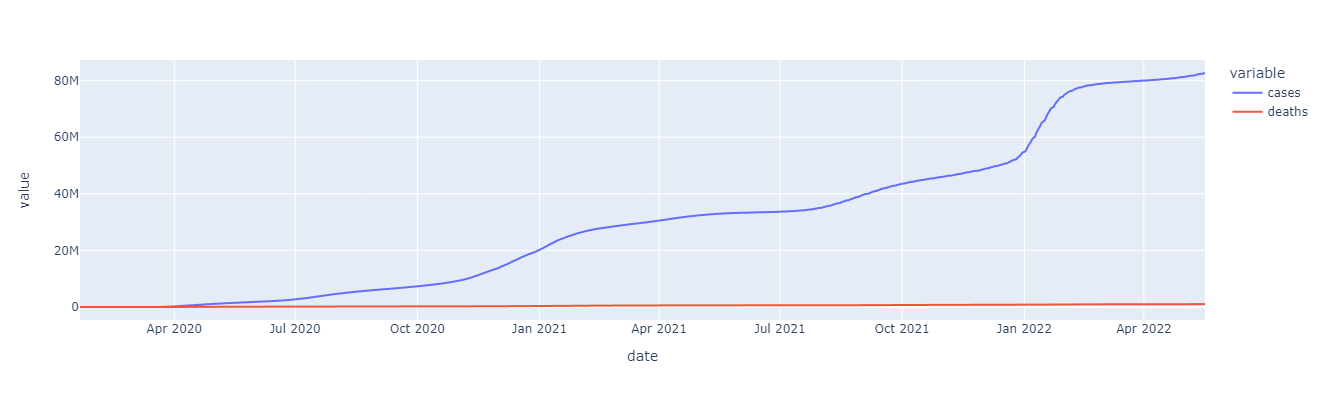

In [49]:
px.line(us, x="date", y=["cases", "deaths"], height=400)

#### State level

In [50]:
perstate20 = mda.per_state(counties20_clean)
perstate20.head()

,state,code,cases,deaths
0,Alabama,AL,52339,697
1,Alaska,AK,22820,118
2,Arizona,AZ,322449,5125
3,Arkansas,AR,24662,390
4,California,CA,770915,10345


In [51]:
px.scatter(perstate20, x='state', y='deaths', 
           hover_data=['cases'],
           color='state', size='deaths', size_max=80, log_y=True)

In [52]:
perstate21 = mda.per_state(counties21_clean)
perstate21.head()

,state,code,cases,deaths
0,Alabama,AL,126583,2024
1,Alaska,AK,63352,419
2,Arizona,AZ,870996,13675
3,Arkansas,AR,65856,966
4,California,CA,1697286,27637


In [53]:
px.scatter(perstate21, x='state', y='deaths', 
           hover_data=['cases'],
           color='state', size='deaths', size_max=80, log_y=True)

In [54]:
perstate22 = mda.per_state(counties22_clean)
perstate22.head()

,state,code,cases,deaths
0,Alabama,AL,186245,2373
1,Alaska,AK,105418,526
2,Arizona,AZ,1283590,17326
3,Arkansas,AR,104125,1186
4,California,CA,2918596,32045


In [55]:
px.scatter(perstate22, x='state', y='deaths', 
           hover_data=['cases'],
           color='state', size='deaths', size_max=80, log_y=True)

#### County level

In [56]:
percounty20 = mda.per_county(counties20_clean)
percounty20.head()

,state,code,county,cases,deaths
0,Alabama,AL,Autauga,4190,48
1,Alabama,AL,Baldwin,13601,161
2,Alabama,AL,Barbour,1514,32
3,Alabama,AL,Bibb,1834,46
4,Alabama,AL,Blount,4641,63


In [57]:
px.bar(percounty20, x = 'state', 
       y = 'cases', color = 'cases', 
       height = 500, hover_data = ['county', 'deaths'])

In [58]:
px.scatter(percounty20, x='cases', y= 'deaths', 
           hover_data=['state', 'county'],
           color='deaths', size='deaths', size_max=80)

In [59]:
percounty21 = mda.per_county(counties21_clean)
percounty21.head()

,state,code,county,cases,deaths
0,Alabama,AL,Autauga,11018,160
1,Alabama,AL,Baldwin,39911,593
2,Alabama,AL,Barbour,3860,81
3,Alabama,AL,Bibb,4533,95
4,Alabama,AL,Blount,11256,198


In [60]:
px.bar(percounty21, x = 'state', 
       y = 'cases', color = 'cases', 
       height = 500, hover_data = ['county', 'deaths'])

In [61]:
px.scatter(percounty21, x='cases', y= 'deaths', 
           hover_data=['state', 'county'],
           color='deaths', size='deaths', size_max=80)

In [62]:
percounty22 = mda.per_county(counties22_clean)
percounty22.head()

,state,code,county,cases,deaths
0,Alabama,AL,Autauga,15871,216
1,Alabama,AL,Baldwin,55941,681
2,Alabama,AL,Barbour,5688,98
3,Alabama,AL,Bibb,6465,105
4,Alabama,AL,Blount,15019,243


In [63]:
px.bar(percounty22, x = 'state', 
       y = 'cases', color = 'cases', 
       height = 500, hover_data = ['county', 'deaths'])

In [64]:
px.scatter(percounty22, x='cases', y= 'deaths', 
           hover_data=['state', 'county'],
           color='deaths', size='deaths', size_max=80)

#### Map 1 (example 2020)

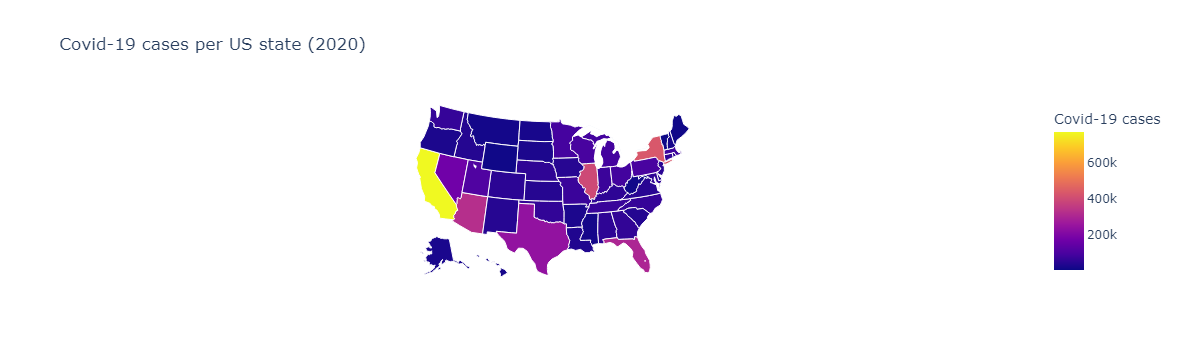

In [65]:
import plotly.graph_objects as go

import pandas as pd
df = perstate20

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
'Cases ' + df['cases']  + '<br>' + \
' Deaths ' + df['deaths']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['cases'].astype(float),
    locationmode='USA-states',
    autocolorscale=True,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Covid-19 cases"
))

fig.update_layout(
    title_text='Covid-19 cases per US state (2020)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

### Map 3

In [66]:
map3 = mda.state_per_month(states_df)

In [67]:
map3.head()

,date,state,code,latitude,longitude,cases,deaths
0,2020-01,Arizona,AZ,34.168219,-111.930907,1,0
1,2020-01,California,CA,37.271875,-119.270415,3,0
2,2020-01,Illinois,IL,39.739318,-89.504139,2,0
3,2020-01,Washington,WA,38.899349,-77.014567,1,0
4,2020-02,Arizona,AZ,34.168219,-111.930907,1,0


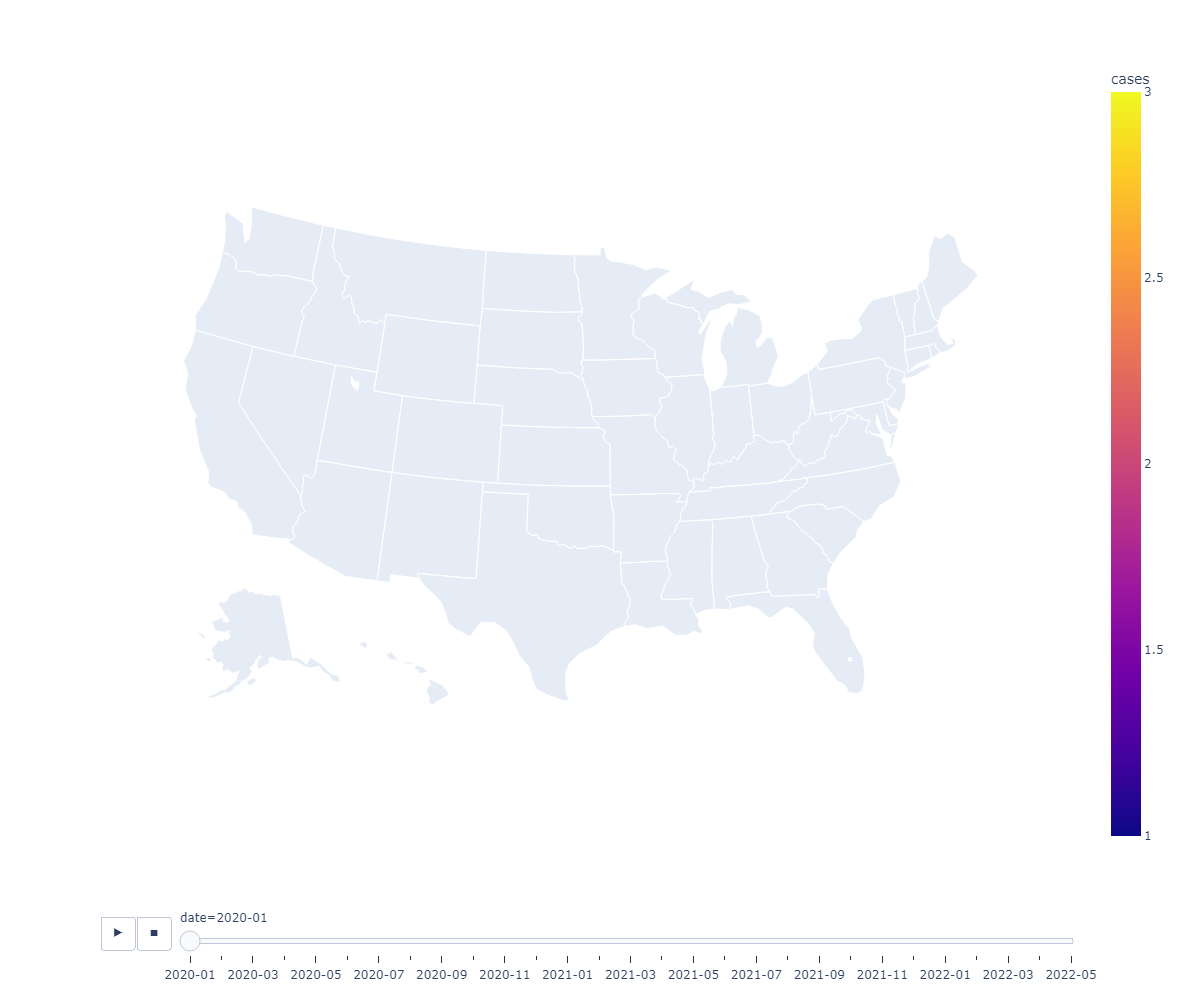

In [68]:
import plotly.express as px
fig = px.scatter_geo(map3, locations="code", color="cases", locationmode="USA-states", hover_name="state", hover_data=["cases", "deaths"], size="cases",
           animation_frame="date", projection="albers usa", width=1000, height=1000)
fig.show()

### Map 4

In [69]:
extra_data = pd.read_csv(cwd+"\extra_data.csv")

In [70]:
map4 = mda.extra_data_retriever(extra_data, map3)

In [71]:
# is_NaN = map4.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# rows_with_NaN = map4[row_has_NaN]
# rows_with_NaN

In [72]:
map4.head()

,date,state,code,latitude,longitude,cases,deaths,1_dose,complete_dose
0,2020-01,Arizona,AZ,34.168219,-111.930907,1,0,0,0
1,2020-01,California,CA,37.271875,-119.270415,3,0,0,0
2,2020-01,Illinois,IL,39.739318,-89.504139,2,0,0,0
3,2020-01,Washington,WA,38.899349,-77.014567,1,0,0,0
13,2020-02,Wisconsin,WI,44.786297,-89.826705,1,0,0,0


In [73]:
def fig_creator(s):
    import plotly.express as px
    
    fig = px.scatter_geo(map4, locations="code", locationmode="USA-states", hover_name="state",
                     hover_data=["cases", "deaths", "1_dose", "complete_dose"], size=s, size_max=20,
                     animation_frame="date", projection="albers usa", title="Covid-19 evolution in US per state", width=1000, height=1000)
    fig.show()

In [74]:
widgets.interact(fig_creator, s=widgets.Dropdown(
    options=[("Cases", "cases"), ("Deaths", "deaths"), ("One Vaccination Dose", "1_dose"), ("Complete Vaccination", "complete_dose")],
    description='Select:'
));

interactive(children=(Dropdown(description='Select:', options=(('Cases', 'cases'), ('Deaths', 'deaths'), ('One…

### Time Series plot

In [75]:
us_timeseries = mda.timeseries_process(us, "us")

In [76]:
us_timeseries.head()

,index,date,cases,deaths,daily_cases,daily_deaths
0,0,2020-01-21,1,0,0,0
1,1,2020-01-22,1,0,0,0
2,2,2020-01-23,1,0,0,0
3,3,2020-01-24,2,0,1,0
4,4,2020-01-25,3,0,1,0


In [77]:
state_timeseries = mda.timeseries_process(states_df, "state")

In [78]:
state_timeseries.head()

,index,date,state,fips,cases,deaths,daily_cases,daily_deaths
0,586,2020-03-13,Alabama,1,6,0,0,0
1,637,2020-03-14,Alabama,1,12,0,6,0
2,689,2020-03-15,Alabama,1,23,0,11,0
3,742,2020-03-16,Alabama,1,29,0,6,0
4,795,2020-03-17,Alabama,1,39,0,10,0


In [79]:
counties = pd.concat([counties20_clean, counties21_clean, counties22_clean])

In [80]:
counties_timeseries = mda.timeseries_process(counties, "county")

In [81]:
counties_timeseries.head()

,index,date,state,county,cases,deaths,daily_cases,daily_deaths
0,4944,2020-03-19,South Carolina,Abbeville,1,0,0,0
1,6792,2020-03-21,South Carolina,Abbeville,1,0,0,0
2,9085,2020-03-23,South Carolina,Abbeville,1,0,0,0
3,11835,2020-03-25,South Carolina,Abbeville,3,0,2,0
4,13435,2020-03-26,South Carolina,Abbeville,4,0,1,0


In [82]:
# counties_timeseries.to_csv(path_or_buf=cwd+"/counties_timeseries.csv")

In [102]:
dropdown_case = widgets.Dropdown(options=[("Daily Cases", 'daily_cases'), ("Daily Deaths", 'daily_deaths')])
dropdown_level = widgets.Dropdown(options=[('USA','us'),('State','state'), ('County','county')])
dropdown_state = widgets.Dropdown(options=state_timeseries['state'].unique())
dropdown_county = widgets.Dropdown(options=counties_timeseries['county'].unique())
input_widgets = widgets.HBox([dropdown_case, dropdown_level])

output = widgets.Output()
def com_filter(case, level, state, county):
    output.clear_output()
    if level == 'us':
        with output:
            mda.plot(us_timeseries, level="us", y=case)
    elif level == "state":
        with output:
            display(dropdown_state)
            mda.plot(state_timeseries, level="state", y=case, state=state)
    elif level == "county":
        with output:
            display(dropdown_county)
            mda.plot(counties_timeseries, level="county", y=case, county=county)

def dropdown_case_eventhandler(change):
    com_filter(change.new, dropdown_level.value, dropdown_state.value, dropdown_county.value)

def dropdown_level_eventhandler(change):
    com_filter(dropdown_case.value, change.new, dropdown_state.value, dropdown_county.value)    
    
def dropdown_state_eventhandler(change):
    com_filter(dropdown_case.value, dropdown_level.value, change.new, dropdown_county.value)
    
def dropdown_county_eventhandler(change):
    com_filter(dropdown_case.value, dropdown_level.value, dropdown_state.value, change.new)
    
dropdown_case.observe(dropdown_case_eventhandler, names='value')
dropdown_level.observe(dropdown_level_eventhandler, names='value')
dropdown_state.observe(dropdown_state_eventhandler, names='value')
dropdown_county.observe(dropdown_county_eventhandler, names='value')
display(input_widgets)


display(output)

Output()

### Clustering